In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math
import timeit

In [33]:
#function for vel-neshast reghabati
def selection(a,b,c,x,l):
    h_prime=[a,b,c]
    ans=max(h_prime)
    key=h_prime.index(ans)
    if a==b and b>c:
        return x
    elif b==c and a<b:
        return x
    else:
        if key==0:
            if x!=0:
                return x-1
            else:
                return l-1
        elif key==1:
            return x
        else:
            if x!=l-1:
                return x+1
            else:
                return 0

creation time : 847.1320251999996


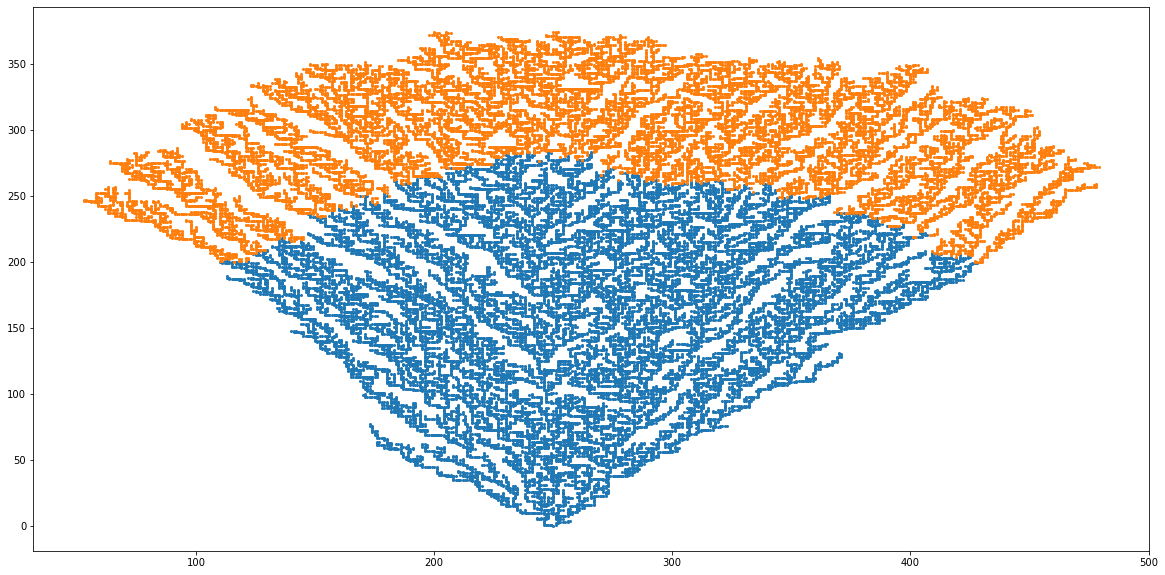

In [35]:
#vel-neshast reghabati creation and show
start=timeit.default_timer()
particle_number=100000
horizontal_length=500
wide=[]
t=[]
xs=[int(horizontal_length/2)]
ys=[0]
h=list(np.zeros(horizontal_length))
h[int(horizontal_length/2)]=1
m=100
for i in range(particle_number):
    x=np.random.randint(horizontal_length)
    if x==0:
        if 1 in xs or horizontal_length-1 in xs:
            key=selection(h[horizontal_length-1],h[0],h[1],x,horizontal_length)
            if key==horizontal_length-1 or key==1:
                if h[key]!=0:
                    xs.append(0)
                    ys.append(h[key])
                h[x]=h[key]
            else:
                if h[key]!=0:
                    xs.append(0)
                    ys.append(h[key]+1)
                h[x]=h[key]+1
    elif x==horizontal_length-1:
        if horizontal_length-2 in xs or 0 in xs: 
            key=selection(h[horizontal_length-2],h[horizontal_length-1],h[0],x,horizontal_length)
            if key==horizontal_length-2 or key==0:
                if h[key]!=0:
                    xs.append(horizontal_length-1)
                    ys.append(h[key])
                h[x]=h[key]
            else:
                if h[key]!=0:
                    xs.append(horizontal_length-1)
                    ys.append(h[key]+1)
                h[x]=h[key]+1
    else:    
        if x-1 or x or x+1 in xs:
            key=selection(h[x-1],h[x],h[x+1],x,horizontal_length)
            if key==x-1 or key==x+1:
                if h[key]!=0:
                    xs.append(x)
                    ys.append(h[key])
                h[x]=h[key]
            else:
                if h[key]!=0:
                    xs.append(x)
                    ys.append(h[key]+1)
                h[x]=h[key]+1
    if i==m:
        wide.append(max(xs)-min(xs))
        t.append(m)
        m=m*2
#vel-neshast reghabati show
fig = plt.figure(figsize=(20,10))
colour=4
n=int(particle_number/colour)
for i in range(n):
    plt.scatter(xs[i*n:(i+1)*n],ys[i*n:(i+1)*n],s=4)
stop=timeit.default_timer()
print('creation time :',stop-start) 

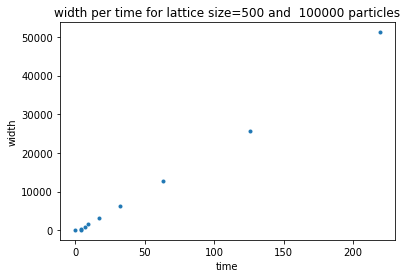

In [36]:
fig,ax=plt.subplots()
ax.set_title('width per time for lattice size=500 and  100000 particles')
ax.set_ylabel('width')
ax.set_xlabel('time')
plt.plot(wide,t,'.')

<ipython-input-43-713d6ac96f49>:2: RuntimeWarning: divide by zero encountered in log
  y=np.log(wide)


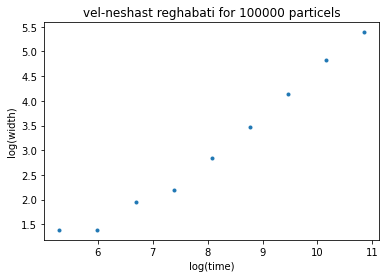

In [43]:
x=np.log(t)
y=np.log(wide)
fig,ax=plt.subplots()
ax.set_title('vel-neshast reghabati for 100000 particels')
ax.set_ylabel('log(width)')
ax.set_xlabel('log(time)')
plt.plot(x,y,'.')
z=np.polyfit(x,y,1)
a=[x[0],x[len(t)-1]]
b=[x[0]*z[0]+z[1],x[len(t)-1]*z[0]+z[1]]
plt.plot(a,b)

In [39]:
wide

[0, 4, 4, 7, 9, 17, 32, 63, 126, 219]